In [4]:
import matplotlib.pyplot as plt
import numpy as np
from math import log, sqrt, pi, exp
import scipy.special
import matplotlib.pylab as pylab


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
from scipy.optimize import minimize
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import dual_annealing

In [5]:
tickers = ["CSCO","BAC","GE"]
#download the prices and volumes for the previously read list of tickers
start_date = '2021-09-01'
end_date = '2022-06-10'
stock_data = yf.download(tickers, start=start_date, end=end_date)
print(stock_data)

[*********************100%***********************]  3 of 3 completed
            Adj Close                             Close             \
                  BAC       CSCO          GE        BAC       CSCO   
Date                                                                 
2021-08-31  40.901459  57.367813  105.016121  41.750000  59.020000   
2021-09-01  40.352840  57.387249  103.272659  41.189999  59.040001   
2021-09-02  40.392227  57.863529  105.862938  41.020000  59.529999   
2021-09-03  40.421772  57.756611  104.358574  41.049999  59.419998   
2021-09-07  40.687637  57.231728  102.904037  41.320000  58.880001   
...               ...        ...         ...        ...        ...   
2022-06-03  36.189999  44.846363   76.878204  36.189999  45.250000   
2022-06-06  36.150002  44.925648   76.908165  36.150002  45.330002   
2022-06-07  36.349998  45.163506   77.906975  36.349998  45.570000   
2022-06-08  35.889999  44.519302   77.067978  35.889999  44.919998   
2022-06-09  34.509998

In [6]:
# Getting Call/Put options: Market Prices
csco = yf.Ticker("csco")
ge = yf.Ticker("ge")
bac = yf.Ticker("bac")

opt_csco = csco.option_chain(date='2022-08-19')
options_cisco = opt_csco
print(options_cisco)

opt_bac = bac.option_chain(date='2022-08-26')
options_bac = opt_bac

opt_ge = ge.option_chain(date='2023-01-20')
options_ge = opt_ge

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice  bid  \
0   CSCO220819C00025000 2022-07-12 14:00:07+00:00    25.0      18.50  0.0   
1   CSCO220819C00030000 2022-07-18 19:36:59+00:00    30.0      12.65  0.0   
2   CSCO220819C00032500 2022-06-28 18:15:07+00:00    32.5      10.85  0.0   
3   CSCO220819C00034000 2022-07-18 16:00:43+00:00    34.0       9.40  0.0   
4   CSCO220819C00035000 2022-07-25 18:45:01+00:00    35.0       9.50  0.0   
5   CSCO220819C00037500 2022-07-15 16:08:48+00:00    37.5       5.70  0.0   
6   CSCO220819C00038000 2022-07-21 14:18:25+00:00    38.0       6.65  0.0   
7   CSCO220819C00038500 2022-07-20 17:57:09+00:00    38.5       5.65  0.0   
8   CSCO220819C00039000 2022-07-26 13:38:56+00:00    39.0       5.70  0.0   
9   CSCO220819C00039500 2022-07-21 14:20:35+00:00    39.5       5.30  0.0   
10  CSCO220819C00040000 2022-07-26 19:59:14+00:00    40.0       4.47  0.0   
11  CSCO220819C00040500 2022-07-21 17:35:40+00:00    40.5     

In [7]:
# Get Market Call Prices - CSCO
strike_call_list_cisco = (options_cisco[0]['strike'])
market_price_call_cisco = (options_cisco[0]['lastPrice'])
market_implied_vol_call_cisco = (options_cisco[0]['impliedVolatility'])
df_market_call_csco = pd.DataFrame({'strike':strike_call_list_cisco ,
                   'lastPrice':market_price_call_cisco ,
                   'impliedVolatility': market_implied_vol_call_cisco})

# Get Market Put Prices - GE
strike_put_list_ge = (options_ge[1]['strike'])
market_price_put_ge = (options_ge[1]['lastPrice'])
market_implied_vol_put_ge = (options_ge[1]['impliedVolatility'])
df_market_put_ge = pd.DataFrame({'strike':strike_put_list_ge ,
                   'lastPrice':market_price_put_ge ,
                   'impliedVolatility': market_implied_vol_put_ge})

# Get Market Call Prices - BAC
strike_call_list_BAC = (options_bac[0]['strike'])
market_price_call_BAC = (options_bac[0]['lastPrice'])
market_implied_vol_call_BAC = (options_bac[0]['impliedVolatility'])
df_market_call_BAC = pd.DataFrame({'strike':strike_call_list_BAC ,
                   'lastPrice':market_price_call_BAC ,
                   'impliedVolatility': market_implied_vol_call_BAC})

print(df_market_call_csco)
print(df_market_put_ge)
print(df_market_call_BAC)

    strike  lastPrice  impliedVolatility
0     25.0      18.50           0.000010
1     30.0      12.65           0.000010
2     32.5      10.85           0.000010
3     34.0       9.40           0.000010
4     35.0       9.50           0.000010
5     37.5       5.70           0.000010
6     38.0       6.65           0.000010
7     38.5       5.65           0.000010
8     39.0       5.70           0.000010
9     39.5       5.30           0.000010
10    40.0       4.47           0.000010
11    40.5       4.60           0.000010
12    41.0       3.15           0.000010
13    41.5       3.40           0.000010
14    42.0       2.96           0.000010
15    42.5       2.58           0.000010
16    43.0       2.31           0.000010
17    43.5       1.99           0.000010
18    44.0       1.69           0.007822
19    44.5       1.43           0.015635
20    45.0       1.21           0.031260
21    45.5       1.01           0.031260
22    46.0       0.80           0.062509
23    46.5      

Text(0.5, 1.0, 'Data from Yahoo Finance: BAC options with expiration on the 26th of August 2022')

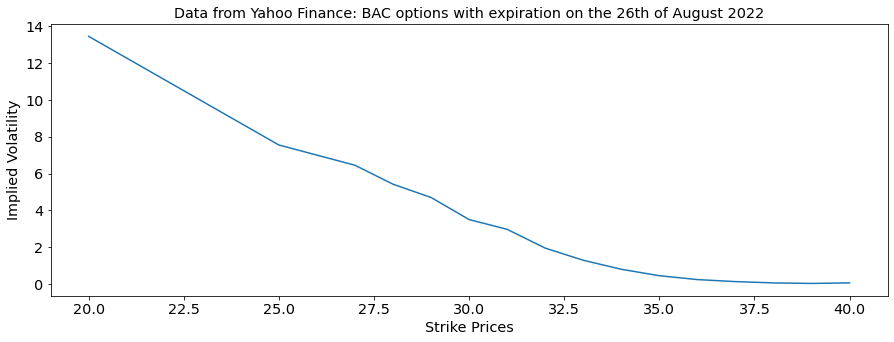

In [10]:
plt.plot(strike_call_list_BAC,market_price_call_BAC)
plt.xlabel("Strike Prices")
plt.ylabel("Implied Volatility")
plt.title("Data from Yahoo Finance: BAC options with expiration on the 26th of August 2022")

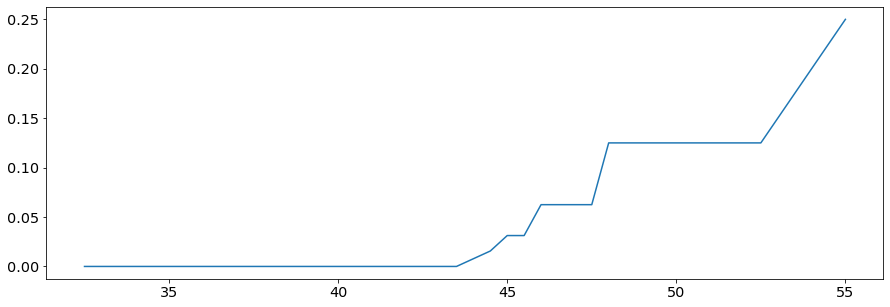

In [9]:
# Choose interesting strikes values: MARKET PRICES - CSCO
call_CSCO_strikes = df_market_call_csco['strike']
market_call_CSCO_impliedVolatility = df_market_call_csco['impliedVolatility']
market_call_CSCO_lastPrice = df_market_call_csco['lastPrice']

call_CSCO_strikes = np.array(call_CSCO_strikes)
call_CSCO_strikes = call_CSCO_strikes[2:]
market_call_CSCO_impliedVolatility = np.array(market_call_CSCO_impliedVolatility)
market_call_CSCO_impliedVolatility = market_call_CSCO_impliedVolatility[2:]
market_call_CSCO_lastPrice = np.array(market_call_CSCO_lastPrice)
market_call_CSCO_lastPrice = market_call_CSCO_lastPrice[2:]

plt.plot(call_CSCO_strikes,market_call_CSCO_impliedVolatility)
# plt.xlim([35,55])

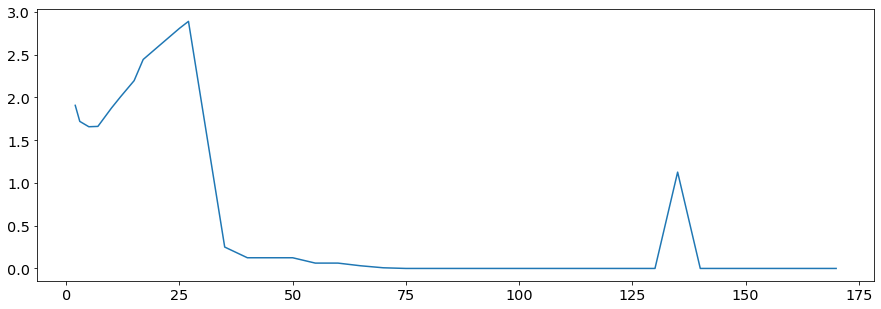

In [13]:
# Choose interesting strikes values: MARKET PRICES - GE
put_GE_strikes = df_market_put_ge['strike']
market_put_GE_impliedVolatility = df_market_put_ge['impliedVolatility']
market_put_GE_lastPrice = df_market_put_ge['lastPrice']

put_GE_strikes = np.array(put_GE_strikes)
market_put_GE_impliedVolatility = np.array(market_put_GE_impliedVolatility)
market_put_GE_lastPrice = np.array(market_put_GE_lastPrice)

plt.plot(put_GE_strikes, market_put_GE_impliedVolatility)

In [ ]:
i = complex(0, 1)
# To be used in the Heston pricer
def fHeston(s, St, K, r, T, sigma, kappa, theta, volvol, rho):
    # To be used a lot
    prod = rho * sigma * i * s
    # Calculate d
    d1 = (prod-kappa) ** 2
    d2 = (sigma**2) * (-2 * i * s + s**2)
    d = np.sqrt(d1 + d2)
    # Calculate g
    g1 = kappa - prod - d
    g2 = kappa - prod + d
    g = g1 / g2
    # Calculate first exponential
    exp1 = np.exp(np.log(St) * i * s) * np.exp(i * s * r * T)
    exp2 = 1 - g * np.exp(-d * T)
    exp3 = 1 - g
    mainExp1 = exp1 * np.power(exp2 / exp3, -2 * theta * kappa/ (sigma**2))
    # Calculate second exponential
    exp4 = theta * kappa * T / (sigma**2)
    exp5 = volvol / (sigma**2)
    exp6 = (1 - np.exp(-d * T)) / (1 - g * np.exp(-d * T))
    mainExp2 = np.exp((exp4 * g1) + (exp5 * g1 * exp6))
    return mainExp1 * mainExp2

In [ ]:
# Heston Pricer
def priceHestonMid(St, K, r, q, T, sigma, kappa, theta, volvol, rho):
    P, iterations, maxNumber = 0, 1000, 100
    ds = maxNumber / iterations
    element1 = 0.5 * (St * np.exp(-q * T) - K * np.exp(-r * T))
    # Calculate the complex integral
    # Using j instead of i to avoid confusion
    for j in range(1, iterations):
        s1 = ds * (2 * j + 1) / 2
        s2 = s1 - i
        numerator1 = fHeston(s2, St, K, r, T,
                             sigma, kappa, theta, volvol, rho)
        numerator2 = K * fHeston(s1, St, K, r, T,
                               sigma, kappa, theta, volvol, rho)
        denominator = np.exp(np.log(K) * i * s1) * i * s1
        P += ds * (numerator1 - numerator2) / denominator
    element2 = P / np.pi
    return np.real((element1 + element2))

In [ ]:
# Test Parameters

S_0_CSCO = 41.11            # stock price: CSCO
S_0_GE = 61.23              # stock price: GE
r = 1.68/100                # interest rate
q_csco = 0.0152             # dividend yield CSCO
q_ge = 0.0032               # dividend yield GE
K_CSCO = 55                 # specific strike CSCO
K_GE = 35                   # specific strike GE
T = 144/250                 # 30 weeks: 150 trading days
N = len(call_CSCO_strikes)

In [ ]:
# Annealing calibration function for Call options
def calibratorHestonSA(St, lowerBounds = [1e-2,1e-2,1e-2,1e-2,-1],
                            upperBounds = [10,10,10,10,1]):

    # Note the difference in the objective function (sum of squares vs vector of errors)
    objectiveFunctionHeston = lambda paramVect: np.sum(np.square((market_call_CSCO_lastPrice - priceHestonMid(St, call_CSCO_strikes,
                                                                        r,
                                                                        q_csco,
                                                                        T,
                                                                        paramVect[0],
                                                                        paramVect[1],
                                                                        paramVect[2],
                                                                        paramVect[3],
                                                                        paramVect[4]))/market_call_CSCO_lastPrice))

    # Define the upper and lower bounds
    bounds = list(zip(lowerBounds, upperBounds))

    # Minimize the function
    results = dual_annealing(objectiveFunctionHeston, bounds = bounds)

    return results

calibratorHestonSA(S_0_CSCO)

In [ ]:
def putPriceHestonMid(St, K, r, q, T, call_price):
    return call_price + K * np/exp(-r * T) - St * np/exp(-q * T)

In [ ]:
# Annealing calibration function for Put options
def calibratorHestonSAPut(St, lowerBounds = [1e-2,1e-2,1e-2,1e-2,-1],
                            upperBounds = [1,1,1,1,1]):

    # Note the difference in the objective function (sum of squares vs vector of errors)
    objectiveFunctionHestonput = lambda paramVect: np.sum(np.square((market_price_put_ge - priceHestonMid(St, put_GE_strikes,
                                                                        r,
                                                                        q_ge,
                                                                        T,
                                                                        paramVect[0],
                                                                        paramVect[1],
                                                                        paramVect[2],
                                                                        paramVect[3],
                                                                        paramVect[4])- put_GE_strikes * np.exp(-r * T) + St * np.exp(-q_ge * T))/market_price_put_ge))

    # Define the upper and lower bounds
    bounds = list(zip(lowerBounds, upperBounds))

    # Minimize the function
    results = dual_annealing(objectiveFunctionHestonput, bounds = bounds)

    return results

calibratorHestonSAPut(S_0_GE)